In [51]:
##Now that I've extracted the visiting team from each game, I'll go ahead and use the same technique to mine other game 
##and scoring details

##The Prereqs:

import pandas as pd
from pandas import DataFrame
import requests
import urllib.request
from bs4 import BeautifulSoup
import re
from IPython.display import Image

##Reloading the url_c column

url_c=pd.read_csv("C:/Users/maya rowen/Downloads/urls.csv")
url_c=url_c.iloc[:,0]

##Splitting the urls into managable chunks

url_c1=url_c[0:650]
url_c2=url_c[650:1300]
url_c3=url_c[1300:1950]
url_c4=url_c[1950:2600]
url_c5=url_c[2600:]

In [24]:
url_c5

2600    http://www.nhl.com/scores/htmlreports/20192020...
2601    http://www.nhl.com/scores/htmlreports/20192020...
2602    http://www.nhl.com/scores/htmlreports/20192020...
2603    http://www.nhl.com/scores/htmlreports/20192020...
2604    http://www.nhl.com/scores/htmlreports/20192020...
                              ...                        
3225    http://www.nhl.com/scores/htmlreports/20192020...
3226    http://www.nhl.com/scores/htmlreports/20192020...
3227    http://www.nhl.com/scores/htmlreports/20192020...
3228    http://www.nhl.com/scores/htmlreports/20192020...
3229    http://www.nhl.com/scores/htmlreports/20192020...
Name: 0, Length: 630, dtype: object

In [14]:
##First, I'll extract the home teams using an almost identical function to the one I used to get the visiting teams:

##The only difference is that the home team name is in the 8th cell of the second table(index 7);
##the visiting team was in the first cell.

def home_f(x):
    response=requests.get(x)
    soup=BeautifulSoup(response.text, "html.parser")
    table=soup.table.contents[1]
    homer=table.findAll(style="font-size: 10px;font-weight:bold")[7].get_text()##index 7, cell 8url_c
    homer_bits=re.split("Game",homer)
    home=homer_bits[0]
    return(home)

In [15]:
##I run the function on each chunk of urls to return columns of home teams from each game
home_c1=url_c1.apply(home_f)

In [16]:
home_c1

0              WINNIPEG JETS
1        PITTSBURGH PENGUINS
2            EDMONTON OILERS
3            SAN JOSE SHARKS
4              BOSTON BRUINS
               ...          
645            WINNIPEG JETS
646    COLUMBUS BLUE JACKETS
647       MONTREAL CANADIENS
648        DETROIT RED WINGS
649      PITTSBURGH PENGUINS
Name: 0, Length: 650, dtype: object

In [17]:
home_c2=url_c2.apply(home_f)

In [18]:
home_c3=url_c3.apply(home_f)

In [20]:
home_c4=url_c4.apply(home_f)

In [21]:
home_c5=url_c5.apply(home_f)

In [56]:
##stacking the home teams into a single column vector with 3230 elements
home_c1=DataFrame(home_c1)
home_c12=home_c1.append(pd.DataFrame(data = home_c2), ignore_index=True)
home_c123=home_c12.append(pd.DataFrame(data = home_c3), ignore_index=True)
home_c1234=home_c123.append(pd.DataFrame(data = home_c4), ignore_index=True)
home_c12345=home_c1234.append(pd.DataFrame(data = home_c5), ignore_index=True)
home_c=home_c12345.iloc[:,0]
home_c12345

,0
0,WINNIPEG JETS
1,PITTSBURGH PENGUINS
2,EDMONTON OILERS
3,SAN JOSE SHARKS
4,BOSTON BRUINS
...,...
3225,CHICAGO BLACKHAWKS
3226,CALGARY FLAMES
3227,VEGAS GOLDEN KNIGHTS
3228,ANAHEIM DUCKS


In [ ]:
##The table indexed 7 in the html code gives details on each goal scored by either team in the game, including overtime
##(if applicable)

PATH = "/Users/maya rowen/Pictures/"
Image(filename = PATH + "scoringsummary.png", width=900, height=900)

##I'm interested in goal number (in the sequence of goals scored throughout the game by either team),

## the period the goal was scored in (1,2,3 overtime, or shootout)

##The time the goal was scored (mm:ss),
##[notice that goal time is given in mmss format, but it listed as time within each 20 minute period, not as time within
##the 60 minute game],

##and the team who scored the goal (home or visitor)

In [58]:
##Goal Times

def goal_times_f(x):
    response=requests.get(x)
    soup=BeautifulSoup(response.text, "html.parser")
    table=soup.table.contents[7]##goal time is in the 8th table, indexed 7
    centers=table.findAll(align="center")##goal times are centered within the table cell; this helps narrow down the text
    lengt=len(centers)##the length of the coding for goal-scoring times varies with the number of goals in the gaem
    combined_goals=(lengt-5)/5##every fifth centered element of table 8 is a goal time, starting with the 6th element
    
##This function will return a list of times for all goals scored in the game. Because the number of goals per game varies,
##to determine how many times to iterate the function, I ask for the length of the list of cells with centered text in
## table[7]. Each goal is associated with 5 cells with centered text. There are also 5 cells with centered text
##not associated with a particular goal in table[7], hence '-5'
##so (lengt-5)/5 tells us how many goals were scored in any game

    mylist=[]##I create a blank list to fill with goal times in mm:ss format. The length is variant on goals scored
    
        
    for x in range(7,lengt,5): ##The first goal time found in the 7th centered cell of the table. 
        ##Each goal time is 5 centered cells from the previous
        mylist.append(str(centers[x].get_text()))##The function will return all goal times as list of strings.
            
    
    return(mylist)

In [59]:
goal_time_c1=url_c1.apply(goal_times_f)

In [61]:
goal_time_c2=url_c2.apply(goal_times_f)

In [62]:
goal_time_c3=url_c3.apply(goal_times_f)

In [63]:
goal_time_c4=url_c4.apply(goal_times_f)

In [64]:
goal_time_c5=url_c5.apply(goal_times_f)

In [70]:
goal_time_c1=DataFrame(goal_time_c1)
goal_time_c12=goal_time_c1.append(pd.DataFrame(data = goal_time_c2), ignore_index=True)
goal_time_c123=goal_time_c12.append(pd.DataFrame(data = goal_time_c3), ignore_index=True)
goal_time_c1234=goal_time_c123.append(pd.DataFrame(data = goal_time_c4), ignore_index=True)
goal_time_c12345=goal_time_c1234.append(pd.DataFrame(data = goal_time_c5), ignore_index=True)
goal_time_c=goal_time_c12345.iloc[:,0]
goal_time_c12345

,0
0,"[15:45, 17:40, 18:23, 8:32, 0:36, 8:07, 11:31,..."
1,"[6:37, 8:31, 17:45, 12:37, 15:37, 3:38, 13:46,..."
2,"[11:01, 8:07, 19:01]"
3,"[8:28, 11:16, 17:17, 19:41, 17:36, 3:12, 9:27,..."
4,"[8:37, 19:49, 5:48, 15:43, 17:07, 18:12, 19:25]"
...,...
3225,"[3:16, 8:22, 16:55, 6:43, 5:32, 19:23, 19:38]"
3226,"[4:39, 0:38, 9:38]"
3227,"[13:40, 15:01, 18:44, 19:56, 14:38, 15:34, 19:51]"
3228,"[10:13, 5:10, 16:56]"


In [69]:
goal_time_c5

2600                                [12:59, 14:56, 16:16]
2601       [3:57, 8:36, 14:42, 1:53, 15:09, 19:01, 19:10]
2602                    [18:28, 6:45, 9:44, 13:12, 19:45]
2603            [13:44, 14:21, 19:33, 8:56, 16:57, 19:38]
2604    [4:55, 8:47, 11:14, 6:53, 18:12, 1:17, 10:56, ...
                              ...                        
3225        [3:16, 8:22, 16:55, 6:43, 5:32, 19:23, 19:38]
3226                                   [4:39, 0:38, 9:38]
3227    [13:40, 15:01, 18:44, 19:56, 14:38, 15:34, 19:51]
3228                                 [10:13, 5:10, 16:56]
3229                           [1:01, 13:28, 18:12, 2:09]
Name: 0, Length: 630, dtype: object

In [75]:
##Goal Periods

def goal_periods_f(x):
    response=requests.get(x)
    soup=BeautifulSoup(response.text, "html.parser")
    table=soup.table.contents[7]
    centers=table.findAll(align="center")
    lengt=len(centers)
    combined_goals=(lengt-5)/5
  
    ##This function returns the period each goal was scored in (1,2,3, OT, & SO)
    
    ##Like the goal time, goal period is in the 8th table (index 7).
    
    ##The text is centered, so 'findAll(align="center")' still helps us find what we're looking for.
    

    
    mylist=[]

    ##As before,
    
        
    for x in range(6,lengt,5):
            ##The only difference in finding goal time and goal period is that a goal time is found in every fifth cell of 
            ##table 8, starting with the 7th cell, while goal times are found in every fifth centered element
            ##of the HTML code for table 8 starting with element 7
        mylist.append(str(centers[x].get_text()))
        
        ##I ask for the goal periods as a list
    
    return(mylist)

In [76]:
goal_period_c1=url_c1.apply(goal_periods_f)

In [78]:
goal_period_c2=url_c2.apply(goal_periods_f)

In [79]:
goal_period_c3=url_c3.apply(goal_periods_f)

In [80]:
goal_period_c4=url_c4.apply(goal_periods_f)

In [81]:
goal_period_c5=url_c5.apply(goal_periods_f)

In [83]:
goal_period_c1=DataFrame(goal_period_c1)
goal_period_c12=goal_period_c1.append(pd.DataFrame(data = goal_period_c2), ignore_index=True)
goal_period_c123=goal_period_c12.append(pd.DataFrame(data = goal_period_c3), ignore_index=True)
goal_period_c1234=goal_period_c123.append(pd.DataFrame(data = goal_period_c4), ignore_index=True)
goal_period_c12345=goal_period_c1234.append(pd.DataFrame(data = goal_period_c5), ignore_index=True)
goal_period_c=goal_period_c12345.iloc[:,0]
goal_period_c12345

,0
0,"[1, 1, 1, 2, 3, 3, 3, 3, 3]"
1,"[1, 1, 1, 2, 2, 3, 3, 3, OT]"
2,"[1, 3, 3]"
3,"[1, 1, 1, 1, 2, 3, 3, 3]"
4,"[1, 1, 2, 2, 3, 3, 3]"
...,...
3225,"[1, 1, 1, 2, 3, 3, 3]"
3226,"[1, 2, 2]"
3227,"[1, 1, 1, 1, 2, 2, 3]"
3228,"[1, 2, 3]"


In [85]:
#Goal Teams

##Again, this function is almost identical to the other two, except the name of the team who scored is found in the 10th
##centered text element of the 8th table's coding:
def goal_teams_f(x):
    response=requests.get(x)
    soup=BeautifulSoup(response.text, "html.parser")
    table=soup.table.contents[7]
    centers=table.findAll(align="center")
    lengt=len(centers)
    combined_goals=(lengt-5)/5
  
    mylist=[]
    
        
    for x in range(9,lengt,5):
        mylist.append(str(centers[x].get_text()))
            
    
    return(mylist)

In [86]:
goal_team_c1=url_c1.apply(goal_teams_f)

In [87]:
goal_team_c2=url_c2.apply(goal_teams_f)

In [88]:
goal_team_c3=url_c3.apply(goal_teams_f)

In [89]:
goal_team_c4=url_c4.apply(goal_teams_f)

In [90]:
goal_team_c5=url_c5.apply(goal_teams_f)

In [124]:
goal_team_c1=DataFrame(goal_team_c1)
goal_team_c12=goal_team_c1.append(pd.DataFrame(data = goal_team_c2), ignore_index=True)
goal_team_c123=goal_team_c12.append(pd.DataFrame(data = goal_team_c3), ignore_index=True)
goal_team_c1234=goal_team_c123.append(pd.DataFrame(data = goal_team_c4), ignore_index=True)
goal_team_c12345=goal_team_c1234.append(pd.DataFrame(data = goal_team_c5), ignore_index=True)
goal_team_c=goal_team_c12345.iloc[:,0]
goal_team_c

0       [TOR, TOR, TOR, TOR, TOR, TOR, WPG, TOR, WPG]
1       [PIT, STL, STL, PIT, STL, STL, PIT, PIT, STL]
2                                     [EDM, EDM, EDM]
3            [PHI, PHI, S.J, S.J, PHI, S.J, PHI, PHI]
4                 [BOS, NSH, BOS, BOS, BOS, NSH, NSH]
                            ...                      
3225              [NSH, NSH, NSH, CHI, CHI, NSH, NSH]
3226                                  [CGY, MIN, CGY]
3227              [L.A, L.A, L.A, L.A, VGK, VGK, L.A]
3228                                  [DAL, DAL, DAL]
3229                             [S.J, S.J, CBJ, S.J]
Name: 0, Length: 3230, dtype: object

In [132]:
##Now that I've created columns for home team, goal time, goal period, and goal team, I'll import my column of visiting 
##teams from the last notebook and create a single dataframe:

visitor_C=pd.read_csv("C:/Users/maya rowen/Downloads/visitor_C.csv")
visitor_c=visitor_C.iloc[:,]

nhl_data=pd.concat([home_c, visitor_c,goal_period_c,goal_time_c,goal_team_c],axis=1)
                  
nhl_data.columns = ['home','visitor','goal_periods','goal_times','goal_team']

nhl_data

,home,visitor,goal_periods,goal_times,goal_team
0,WINNIPEG JETS,TORONTO MAPLE LEAFS,"[1, 1, 1, 2, 3, 3, 3, 3, 3]","[15:45, 17:40, 18:23, 8:32, 0:36, 8:07, 11:31,...","[TOR, TOR, TOR, TOR, TOR, TOR, WPG, TOR, WPG]"
1,PITTSBURGH PENGUINS,ST. LOUIS BLUES,"[1, 1, 1, 2, 2, 3, 3, 3, OT]","[6:37, 8:31, 17:45, 12:37, 15:37, 3:38, 13:46,...","[PIT, STL, STL, PIT, STL, STL, PIT, PIT, STL]"
2,EDMONTON OILERS,CALGARY FLAMES,"[1, 3, 3]","[11:01, 8:07, 19:01]","[EDM, EDM, EDM]"
3,SAN JOSE SHARKS,PHILADELPHIA FLYERS,"[1, 1, 1, 1, 2, 3, 3, 3]","[8:28, 11:16, 17:17, 19:41, 17:36, 3:12, 9:27,...","[PHI, PHI, S.J, S.J, PHI, S.J, PHI, PHI]"
4,BOSTON BRUINS,NASHVILLE PREDATORS,"[1, 1, 2, 2, 3, 3, 3]","[8:37, 19:49, 5:48, 15:43, 17:07, 18:12, 19:25]","[BOS, NSH, BOS, BOS, BOS, NSH, NSH]"
...,...,...,...,...,...
3225,CHICAGO BLACKHAWKS,NASHVILLE PREDATORS,"[1, 1, 1, 2, 3, 3, 3]","[3:16, 8:22, 16:55, 6:43, 5:32, 19:23, 19:38]","[NSH, NSH, NSH, CHI, CHI, NSH, NSH]"
3226,CALGARY FLAMES,MINNESOTA WILD,"[1, 2, 2]","[4:39, 0:38, 9:38]","[CGY, MIN, CGY]"
3227,VEGAS GOLDEN KNIGHTS,LOS ANGELES KINGS,"[1, 1, 1, 1, 2, 2, 3]","[13:40, 15:01, 18:44, 19:56, 14:38, 15:34, 19:51]","[L.A, L.A, L.A, L.A, VGK, VGK, L.A]"
3228,ANAHEIM DUCKS,DALLAS STARS,"[1, 2, 3]","[10:13, 5:10, 16:56]","[DAL, DAL, DAL]"


In [133]:
##and there you have it

##Next time I'll start converting this data into a more usable format, by creating individual columns for each element
##of the list variables...

export_csv = nhl_data.to_csv(r'C:/Users/maya rowen/Downloads/nhl_data_lists.csv', index = None, header=True)

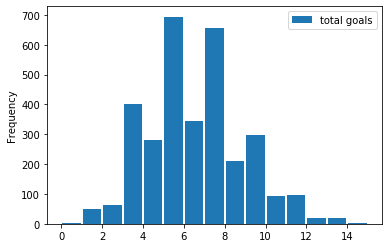

In [134]:
##Before I wrap up this section though, I'll make a quick histogram to take a first glance at the scoring distribution
##of the games in my data.

##Since my listed columns have a elements that are statistics corresponding to each goal in a given game,
##the length of any of them is the total number of goals by both teams in that game:

nhl_data['total goals']=(nhl_data['goal_times']).apply(len)
nhl_data['total goals']
total_goals=DataFrame(nhl_data['total goals'])
total_goals.plot.hist(bins=15,rwidth=0.9)